In [351]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [352]:
df_consumption = pd.read_csv('SolarMonthlyData_2657Custs.csv')

In [353]:
df_consumption.head()

,Customer ID,Netwk Bill Rate Type,Consumption Month,Sum,Unit of me
0,1,SC,1.2007,31.0,DAY
1,1,SC,1.2008,31.0,DAY
2,1,SC,1.2009,31.0,DAY
3,1,SC,1.2010,31.0,DAY
4,1,PK,1.2011,31.0,DAY


In [355]:

# Delete all rows with unit of measurment as 'DAY'
indexDay = df_consumption[df_consumption['Unit of me']=='DAY'].index



In [356]:
print(len(df_consumption.index))

1378654


In [357]:
df_consumption.drop(indexDay , inplace=True)
#df_consumption.head()

In [358]:
print(len(df_consumption.index))

1114568


In [359]:
df_consumption.head()

,Customer ID,Netwk Bill Rate Type,Consumption Month,Sum,Unit of me
95,1,SC,1.2007,422.167,KWH
96,1,OP1,1.2007,168.073,KWH
97,1,OP1,1.2008,145.746,KWH
98,1,SC,1.2008,556.769,KWH
99,1,OP1,1.2009,189.888,KWH


In [ ]:
# Selecting only rows that are related to energy consumption from grid

In [361]:
my_list = ['OP','SH','PK','SC','OP1','OP2','LVS','LVP']
#df_grid = df_consumption[df_consumption['Netwk Bill Rate Type']==('OP' and 'SH' and 'PK' and 'SC' and 'OP1' and 'OP2' and 'LVS' and 'LVP')]
df_grid = df_consumption.loc[df_consumption["Netwk Bill Rate Type"].isin(my_list)]

In [364]:
#Aggregating the data based on customer DI and consumption month
df_grid_consumption = df_grid.groupby(['Customer ID','Consumption Month'])['Sum'].agg(grid_consumption = 'sum')
df_grid_consumption

grid_consumption
Customer ID Consumption Month                  
1           1.2007                      590.240
            1.2008                      702.515
            1.2009                      737.965
            1.2010                      625.996
            1.2011                      596.787
...                                         ...
2768        12.2010                     298.041
            12.2011                     290.198
            12.2012                     298.046
            12.2013                     246.545
            12.2014                     329.715

[261280 rows x 1 columns]

In [365]:
# Selecting only rows that are related to energy genertated from solar
second_list = ['PGR','SGR','OGR','OGG','PGG','SGG']
df_solar = df_consumption.loc[df_consumption["Netwk Bill Rate Type"].isin(second_list)]

In [366]:
df_solar

,Customer ID,Netwk Bill Rate Type,Consumption Month,Sum,Unit of me
104,1,OGR,1.2011,2.060,KWH
107,1,SGR,1.2011,411.840,KWH
109,1,PGR,1.2011,131.230,KWH
113,1,OGR,1.2012,2.031,KWH
115,1,PGR,1.2012,116.147,KWH
...,...,...,...,...,...
1378645,2768,PGR,12.2013,121.039,KWH
1378647,2768,OGR,12.2013,1.642,KWH
1378649,2768,SGR,12.2014,254.409,KWH
1378651,2768,PGR,12.2014,104.164,KWH


In [367]:
#Aggregating the data based on customer ID and consumption month

df_solar_consumption = df_solar.groupby(['Customer ID','Consumption Month'])['Sum'].agg(solar_consumption = 'sum')
df_solar_consumption

solar_consumption
Customer ID Consumption Month                   
1           1.2011                       545.130
            1.2012                       473.750
            1.2013                       518.467
            1.2014                       562.399
            2.2011                       371.596
...                                          ...
2768        12.2010                      348.594
            12.2011                      270.981
            12.2012                      350.833
            12.2013                      379.424
            12.2014                      360.001

[138251 rows x 1 columns]

In [368]:
unique_consumption_months = df_solar_consumption.index.get_level_values('Consumption Month').unique()
print(unique_consumption_months)

Float64Index([ 1.2011,  1.2012,  1.2013,  1.2014,  2.2011,  2.2012,  2.2013,
               2.2014,  3.2011,  3.2012,  3.2013,  3.2014,  4.2011,  4.2012,
               4.2013,  4.2014,   5.201,  5.2011,  5.2012,  5.2013,  5.2014,
                6.201,  6.2011,  6.2012,  6.2013,  6.2014,   7.201,  7.2011,
               7.2012,  7.2013,  7.2014,   8.201,  8.2011,  8.2012,  8.2013,
               8.2014,   9.201,  9.2011,  9.2012,  9.2013,  9.2014,  10.201,
              10.2011, 10.2012, 10.2013, 10.2014,  11.201, 11.2011, 11.2012,
              11.2013,  12.201, 12.2011, 12.2012, 12.2013,   4.201, 11.2014,
                3.201,  1.2015,  2.2015,  3.2015, 12.2014,  4.2015,   2.201],
             dtype='float64', name='Consumption Month')


In [369]:
# Joining grid and solar consumption
merged_df = pd.merge(df_grid_consumption, df_solar_consumption, on=['Customer ID', 'Consumption Month'], how='left')

print(merged_df)

                               grid_consumption  solar_consumption
Customer ID Consumption Month                                     
1           1.2007                      590.240                NaN
            1.2008                      702.515                NaN
            1.2009                      737.965                NaN
            1.2010                      625.996                NaN
            1.2011                      596.787            545.130
...                                         ...                ...
2768        12.2010                     298.041            348.594
            12.2011                     290.198            270.981
            12.2012                     298.046            350.833
            12.2013                     246.545            379.424
            12.2014                     329.715            360.001

[261280 rows x 2 columns]


In [370]:
merged_df.fillna(0, inplace=True)
print(merged_df)

                               grid_consumption  solar_consumption
Customer ID Consumption Month                                     
1           1.2007                      590.240              0.000
            1.2008                      702.515              0.000
            1.2009                      737.965              0.000
            1.2010                      625.996              0.000
            1.2011                      596.787            545.130
...                                         ...                ...
2768        12.2010                     298.041            348.594
            12.2011                     290.198            270.981
            12.2012                     298.046            350.833
            12.2013                     246.545            379.424
            12.2014                     329.715            360.001

[261280 rows x 2 columns]


In [371]:
merged_df.reset_index(inplace=True)


In [375]:
merged_df['Consumption Month'] = merged_df['Consumption Month'].astype(str)
merged_df[['Month', 'Year']] = merged_df['Consumption Month'].str.split('.', expand=True)
#merged_df['Month'] = merged_df['Consumption Month'].str[:2]  
#merged_df['Year'] = merged_df['Consumption Month'].str[-4:]  

In [376]:
merged_df

,Customer ID,Consumption Month,grid_consumption,solar_consumption,Month,Year
0,1,1.2007,590.240,0.000,1,2007
1,1,1.2008,702.515,0.000,1,2008
2,1,1.2009,737.965,0.000,1,2009
3,1,1.201,625.996,0.000,1,201
4,1,1.2011,596.787,545.130,1,2011
...,...,...,...,...,...,...
261275,2768,12.201,298.041,348.594,12,201
261276,2768,12.2011,290.198,270.981,12,2011
261277,2768,12.2012,298.046,350.833,12,2012
261278,2768,12.2013,246.545,379.424,12,2013


In [377]:
#merged_df['Year'] = merged_df['Year'].str.replace('.201', '2010',regex= True)
#merged_df['Year'] = merged_df['Year'].apply(lambda x: x.zfill(4))

# Convert 'Year' column to string
merged_df['Year'] = merged_df['Year'].astype(str)

# Pad with zeros at the end of the year values
merged_df['Year'] = merged_df['Year'].apply(lambda x: x.ljust(4, '0'))


In [378]:
merged_df

,Customer ID,Consumption Month,grid_consumption,solar_consumption,Month,Year
0,1,1.2007,590.240,0.000,1,2007
1,1,1.2008,702.515,0.000,1,2008
2,1,1.2009,737.965,0.000,1,2009
3,1,1.201,625.996,0.000,1,2010
4,1,1.2011,596.787,545.130,1,2011
...,...,...,...,...,...,...
261275,2768,12.201,298.041,348.594,12,2010
261276,2768,12.2011,290.198,270.981,12,2011
261277,2768,12.2012,298.046,350.833,12,2012
261278,2768,12.2013,246.545,379.424,12,2013


In [448]:
#Calculating net house hold consumption
#Net Household Consumption = Total Grid Consumption - Solar Power Output

In [379]:
merged_df['net_household_consumption']= merged_df['grid_consumption']-merged_df['solar_consumption']

In [380]:
merged_df

,Customer ID,Consumption Month,grid_consumption,solar_consumption,Month,Year,net_household_consumption
0,1,1.2007,590.240,0.000,1,2007,590.240
1,1,1.2008,702.515,0.000,1,2008,702.515
2,1,1.2009,737.965,0.000,1,2009,737.965
3,1,1.201,625.996,0.000,1,2010,625.996
4,1,1.2011,596.787,545.130,1,2011,51.657
...,...,...,...,...,...,...,...
261275,2768,12.201,298.041,348.594,12,2010,-50.553
261276,2768,12.2011,290.198,270.981,12,2011,19.217
261277,2768,12.2012,298.046,350.833,12,2012,-52.787
261278,2768,12.2013,246.545,379.424,12,2013,-132.879


In [381]:
net_consumption = merged_df[(merged_df['solar_consumption'] != 0) & (merged_df['Year']< '2015')]

In [382]:
net_consumption.loc[:, 'Date'] = net_consumption['Year'] + '-' + net_consumption['Month']

net_consumption

C:\Users\rgkam\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Customer ID,Consumption Month,grid_consumption,solar_consumption,Month,Year,net_household_consumption,Date
4,1,1.2011,596.787,545.130,1,2011,51.657,2011-1
5,1,1.2012,637.328,473.750,1,2012,163.578,2012-1
6,1,1.2013,589.471,518.467,1,2013,71.004,2013-1
7,1,1.2014,581.259,562.399,1,2014,18.860,2014-1
12,1,2.2011,648.708,371.596,2,2011,277.112,2011-2
...,...,...,...,...,...,...,...,...
261275,2768,12.201,298.041,348.594,12,2010,-50.553,2010-12
261276,2768,12.2011,290.198,270.981,12,2011,19.217,2011-12
261277,2768,12.2012,298.046,350.833,12,2012,-52.787,2012-12
261278,2768,12.2013,246.545,379.424,12,2013,-132.879,2013-12


In [383]:
net_consumption['Year'].value_counts()

2013    31627
2012    31565
2014    31037
2011    28671
2010     7251
Name: Year, dtype: int64

In [ ]:
#Yearly energy consumption from the grid

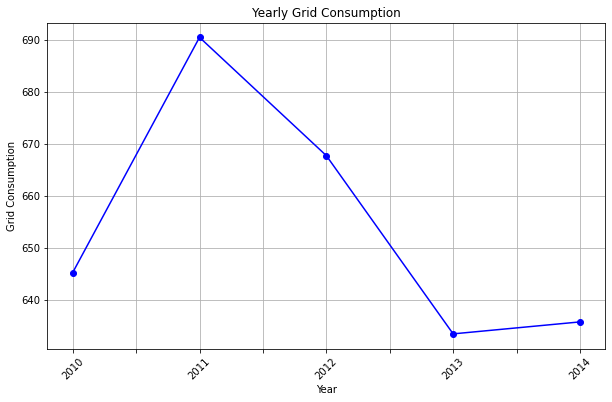

In [384]:
yearly_grid_consumption = net_consumption.groupby('Year')['grid_consumption'].mean()

# Plot the line chart
plt.figure(figsize=(10, 6))
yearly_grid_consumption.plot(kind='line', marker='o', color='b')
plt.title('Yearly Grid Consumption')
plt.xlabel('Year')
plt.ylabel('Grid Consumption')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [ ]:
#Yearly energy consumption from the solar resources

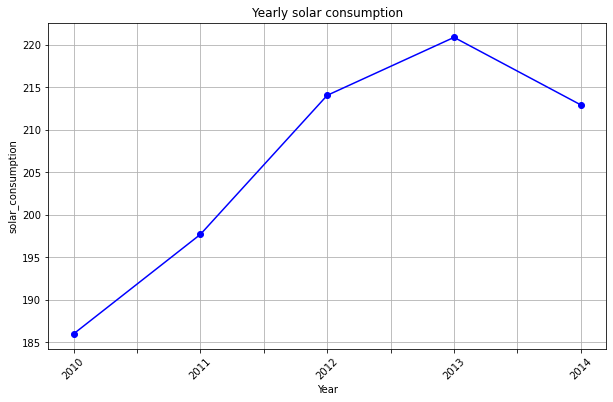

In [385]:
yearly_solar_consumption = net_consumption.groupby('Year')['solar_consumption'].mean()

# Plot the line chart
plt.figure(figsize=(10, 6))
yearly_solar_consumption.plot(kind='line', marker='o', color='b')
plt.title('Yearly solar consumption')
plt.xlabel('Year')
plt.ylabel('solar_consumption')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [ ]:
#Yearly net household consumption

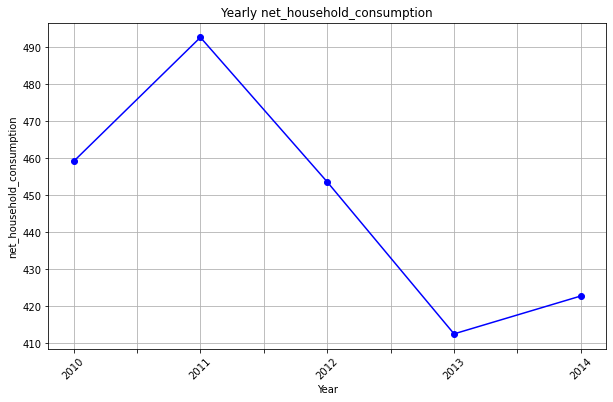

In [386]:
yearly_net_household_consumption = net_consumption.groupby('Year')['net_household_consumption'].mean()

# Plot the line chart
plt.figure(figsize=(10, 6))
yearly_net_household_consumption.plot(kind='line', marker='o', color='b')
plt.title('Yearly net_household_consumption')
plt.xlabel('Year')
plt.ylabel('net_household_consumption')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [387]:
net_consumption

,Customer ID,Consumption Month,grid_consumption,solar_consumption,Month,Year,net_household_consumption,Date
4,1,1.2011,596.787,545.130,1,2011,51.657,2011-1
5,1,1.2012,637.328,473.750,1,2012,163.578,2012-1
6,1,1.2013,589.471,518.467,1,2013,71.004,2013-1
7,1,1.2014,581.259,562.399,1,2014,18.860,2014-1
12,1,2.2011,648.708,371.596,2,2011,277.112,2011-2
...,...,...,...,...,...,...,...,...
261275,2768,12.201,298.041,348.594,12,2010,-50.553,2010-12
261276,2768,12.2011,290.198,270.981,12,2011,19.217,2011-12
261277,2768,12.2012,298.046,350.833,12,2012,-52.787,2012-12
261278,2768,12.2013,246.545,379.424,12,2013,-132.879,2013-12


In [388]:
columns_to_drop = ['Customer ID', 'Consumption Month', 'Year', 'Month']
net_consumption = net_consumption.drop(columns=columns_to_drop)
net_consumption

,grid_consumption,solar_consumption,net_household_consumption,Date
4,596.787,545.130,51.657,2011-1
5,637.328,473.750,163.578,2012-1
6,589.471,518.467,71.004,2013-1
7,581.259,562.399,18.860,2014-1
12,648.708,371.596,277.112,2011-2
...,...,...,...,...
261275,298.041,348.594,-50.553,2010-12
261276,290.198,270.981,19.217,2011-12
261277,298.046,350.833,-52.787,2012-12
261278,246.545,379.424,-132.879,2013-12


In [389]:
net_consumption['Date'] = pd.to_datetime(net_consumption['Date'], format='%Y-%m')
net_consumption.set_index('Date',inplace=True)

In [390]:
net_consumption

,grid_consumption,solar_consumption,net_household_consumption
Date,,,
2011-01-01,596.787,545.130,51.657
2012-01-01,637.328,473.750,163.578
2013-01-01,589.471,518.467,71.004
2014-01-01,581.259,562.399,18.860
2011-02-01,648.708,371.596,277.112
...,...,...,...
2010-12-01,298.041,348.594,-50.553
2011-12-01,290.198,270.981,19.217
2012-12-01,298.046,350.833,-52.787


In [444]:
net_consumption_mean = net_consumption.groupby('Date').mean()


C:\Users\rgkam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


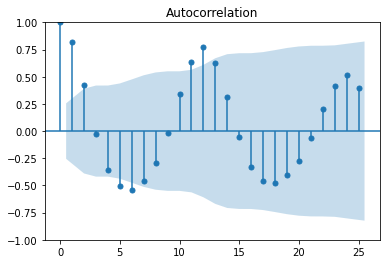

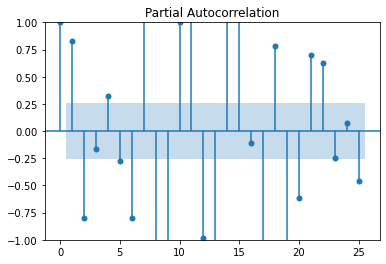

In [447]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Original time series plot for reference
plot_acf(net_consumption_mean['net_household_consumption'], lags=25)
plot_pacf(net_consumption_mean['net_household_consumption'], lags=25)
plt.show()

In [393]:
net_consumption

,grid_consumption,solar_consumption,net_household_consumption
Date,,,
2011-01-01,596.787,545.130,51.657
2012-01-01,637.328,473.750,163.578
2013-01-01,589.471,518.467,71.004
2014-01-01,581.259,562.399,18.860
2011-02-01,648.708,371.596,277.112
...,...,...,...
2010-12-01,298.041,348.594,-50.553
2011-12-01,290.198,270.981,19.217
2012-12-01,298.046,350.833,-52.787


C:\Users\rgkam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rgkam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


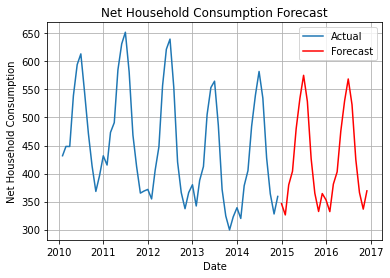

In [436]:
net_consumption_mean = net_consumption.groupby('Date').mean()


order = (0, 0, 0)  # Example order for SARIMA (p, d, q)
seasonal_order = (1, 1, 0, 6)  # Example seasonal order for SARIMA (P, D, Q, s)
model = SARIMAX(net_consumption_mean['net_household_consumption'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Forecast
forecast = results.get_forecast(steps=24)  # Example: Forecasting for the next 12 months

# Plot
#plt.figure(figsize=(10, 6))
plt.plot(net_consumption_mean.index, net_consumption_mean['net_household_consumption'], label='Actual')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', color='red')
plt.title('Net Household Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Net Household Consumption')
plt.legend()
plt.grid(True)
plt.show()